## AUGMENT - Fashion MNIST
---
* Using PyTorch
* PyTorch Vision - FashionMNIST

In [25]:
import os
import sys

import torch
import torch.nn as nn
from torch.utils.data import DataLoader

import torchvision
from torchvision import transforms

from models import BaselineCNN, LeNet5, ResNetMini, DenseNetTiny, MobileNetLite, ViTTiny
from utils import train_eval_report
from utils import visualise_fashion_mnist
from utils.globals import BATCH_SIZE, LEARNING_RATE
from utils.globals import device, loss_fn  #, early_stopper

In [26]:
# import dataset - fashion MNIST

# Specify transforms
# NOTE FIXME!
# - Ask bro what transformations are available and what a good mix of them could be
# - Is the augmented data added to the original dataset or does it replace the orginial?
# - See README for plan of augmentations... any other to add? 
transform = transforms.Compose([
    transforms.RandomCrop(size=24),  # NOTE What is good crop - original is 28x28
    transforms.GaussianBlur(kernel_size=5),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomVerticalFlip(p=0.5),
    transforms.ToTensor(),  # Convert from image.PIL to tensors
])

download = not os.path.exists('./data/FashionMNIST')
train_dataset = torchvision.datasets.FashionMNIST(root='./data/', train=True, download=download, transform=transform)
test_dataset = torchvision.datasets.FashionMNIST(root='./data/', train=False, download=download, transform=transform)

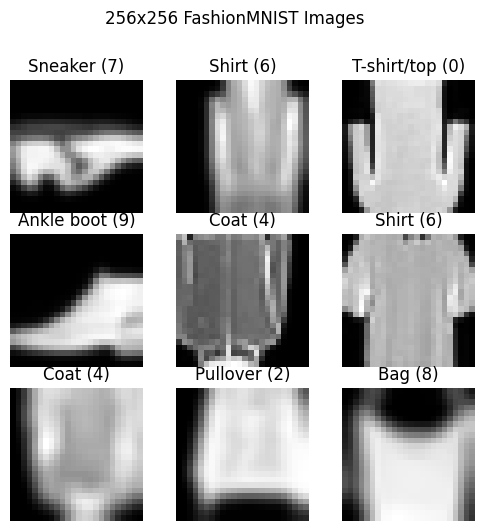

In [27]:
# test sample
visualise_fashion_mnist(train_dataset)